In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn import tree

In [2]:
data = pd.read_csv('generated_data.csv', header=0)

In [3]:
data.head()

,User_id,Transaction_id,Amount,Recipient,Sender,Start_time_year,Start_time_month,Start_time_day,Start_time_hour,Start_time_minute,start_time_second,Completion_time_year,Completion_time_month,Completion_time_day,Completion_time_hour,Completion_time_minute,Completion_time_second,label
0,15,63,23695.78,546540224,548834670,2019,1,10,0,51,13,2019,1,10,0,1,13,FRAUD
1,15,543,49518.19,546540224,548834670,2019,10,5,4,8,46,2019,10,5,4,10,46,FRAUD
2,15,204,760.54,546540224,548834670,2019,9,10,8,7,23,2019,9,10,8,9,23,NOT_FRAUD
3,15,473,757.82,546540224,548834670,2019,11,21,6,9,50,2019,11,21,6,11,50,NOT_FRAUD
4,15,310,28660.99,551715333,548834670,2019,1,3,8,51,53,2019,1,3,8,1,53,FRAUD


In [4]:
features = list(data.columns[0:17])
features

['User_id',
 'Transaction_id',
 'Amount',
 'Recipient',
 'Sender',
 'Start_time_year',
 'Start_time_month',
 'Start_time_day',
 'Start_time_hour',
 'Start_time_minute',
 'start_time_second',
 'Completion_time_year',
 'Completion_time_month',
 'Completion_time_day',
 'Completion_time_hour',
 'Completion_time_minute',
 'Completion_time_second']

In [5]:
y = data['label']
x = data[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

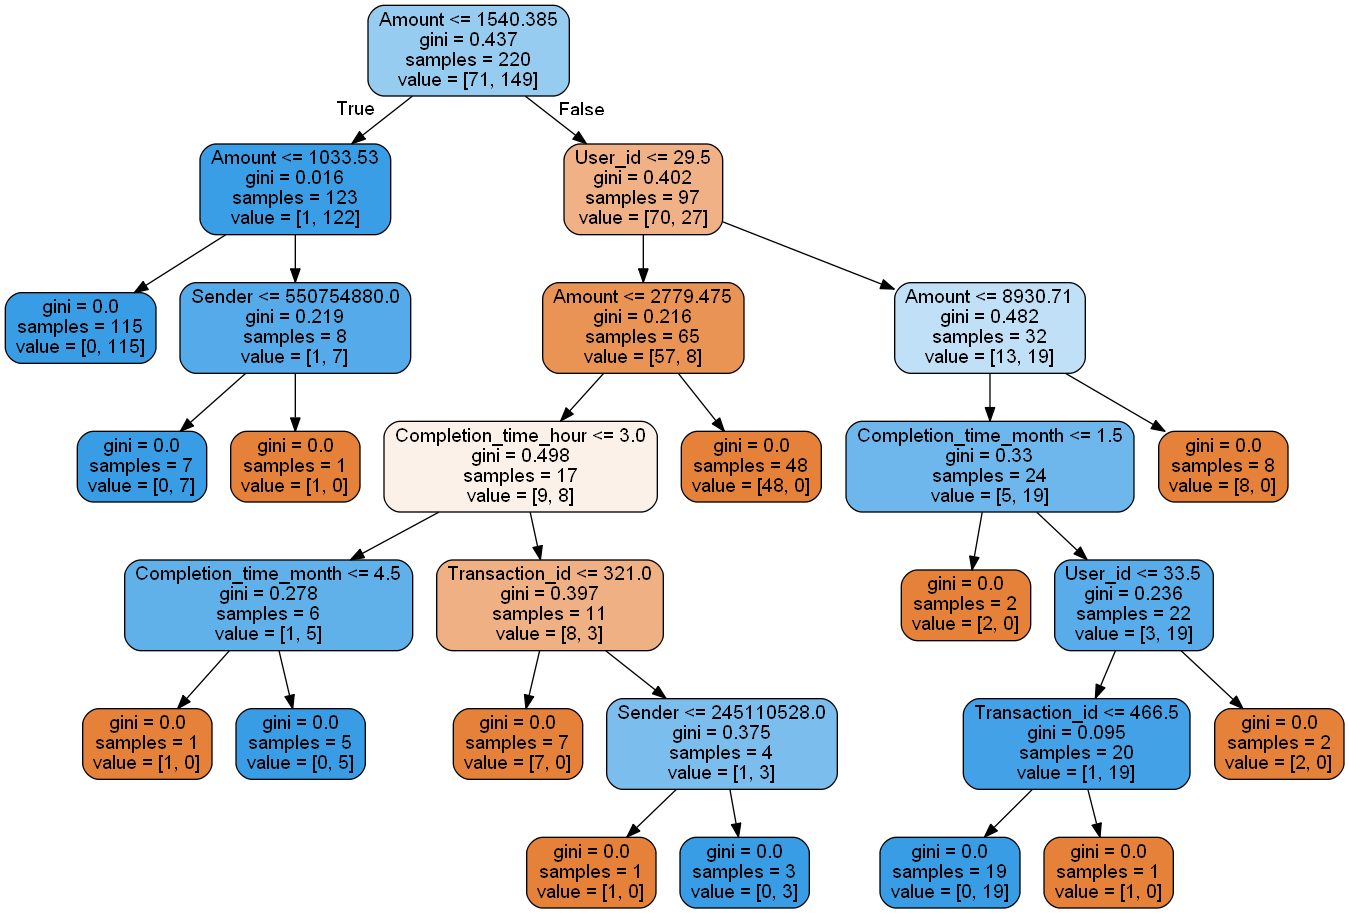

In [6]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, feature_names=list(features),
                    filled=True, rounded=True,)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [7]:
x = data.values[:, 0:16]
y = data.values[:, 17]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state = 100)

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state=100,
                                        max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [8]:
y_pred_en = clf_entropy.predict(x_test)
print(y_pred_en)

['FRAUD' 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD'
 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD'
 'NOT_FRAUD']


In [9]:
print("Accuracy is "), accuracy_score(y_test, y_pred_en)*100

Accuracy is 


(None, 77.27272727272727)

In [10]:
import pickle
file = open('model.sav', 'wb')
pickle.dump(clf_entropy, file)

file.close()